### Life expectancy

In [2]:
#import libraries for data manipulation

import pandas as pd
import numpy as np

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#open csv file
gdp_data = pd.read_csv('all_data.csv')

#preview first rows
print(gdp_data.head())

#preview last rows
gdp_data.tail()

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [4]:
# rename columns

gdp_data.rename(columns={
    'Life expectancy at birth (years)':'Life Expectancy'
}, 
inplace=True)

In [5]:
# check data types

gdp_data.dtypes

Country             object
Year                 int64
Life Expectancy    float64
GDP                float64
dtype: object

In [6]:
# display different countries

gdp_data.Country.value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [7]:
# display count of years
gdp_data.Year.value_counts()

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64

In [8]:
# look for null values
gdp_data.isna().sum()

Country            0
Year               0
Life Expectancy    0
GDP                0
dtype: int64

Text(0.5, 0, 'Life expectancy at birth (years)')

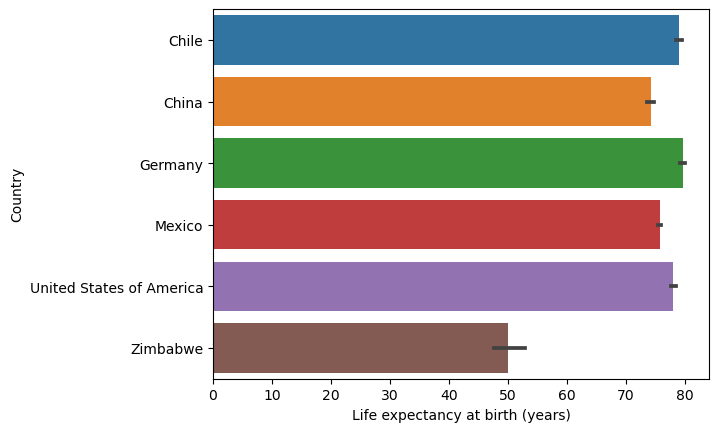

In [9]:
# barplot of life expectancy by country
sns.barplot(x="Life Expectancy", y="Country", data=gdp_data)
plt.xlabel("Life expectancy at birth (years)")

[]

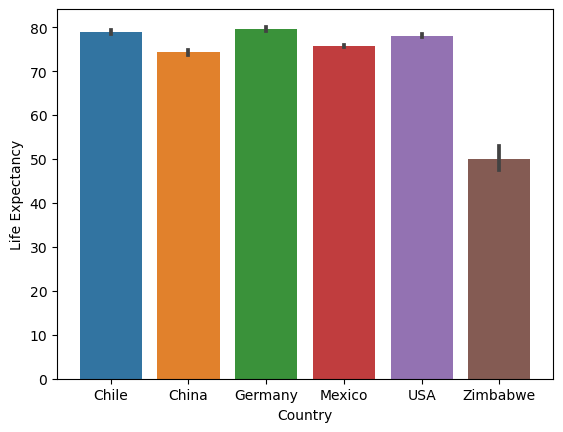

In [10]:
# alternative barplot
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']


sns.barplot(x='Country', y='Life Expectancy', data=gdp_data)
ax=plt.subplot()
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.plot()


The highest life expectancy is 80 years old, the countries with highest life expectancy are Germany, the United States and Chile, the country with the lowest Life expectancy is Zimbabwe.

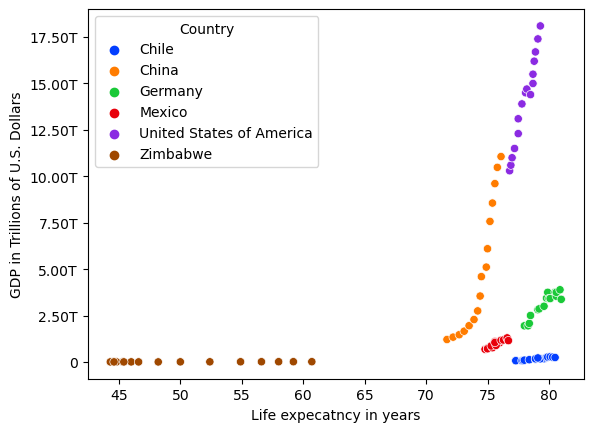

In [85]:
# plot a scatterplot to visualize GDP compared to Life expectancy by country

def readable_numbers(x, pos):
  """Takes a large number and formats it into K, M, B to make it more readable."""
  if x >= 1e12:
    s = '{:1.2f}T'.format(x * 1e-12)  # Added for trillions
  elif x >= 1e9:
    s = '{:1.2f}B'.format(x * 1e-9)  # Changed to billions
  elif x >= 1e6:
    s = '{:1.1f}M'.format(x * 1e-6)
  elif x >= 1e3:
    s = '{:1.0f}K'.format(x * 1e-3)
  else:
    s = '{:1.0f}'.format(x)
  return s


ax = sns.scatterplot(data=gdp_data, x='Life Expectancy', y='GDP', hue='Country', palette='bright')
ax.yaxis.set_major_formatter(readable_numbers)
ax.set(ylabel="GDP in Trillions of U.S. Dollars")
plt.xlabel('Life expecatncy in years')
plt.show()


In general one can see an increase in GDP and life expectancy, exhibiting a positive correlation. To better demonstrate this correlation we can plot a FacetGrid for each country.

c:\Users\oscar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


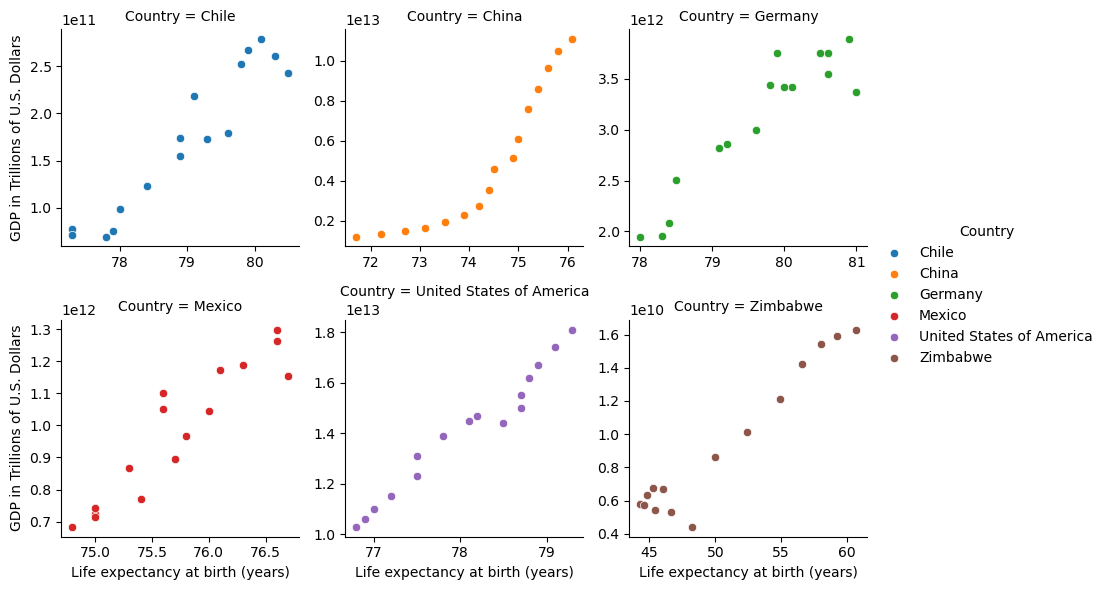

In [69]:
graph = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life Expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

Text(0.5, 0, 'GDP in trillions of Dollars')

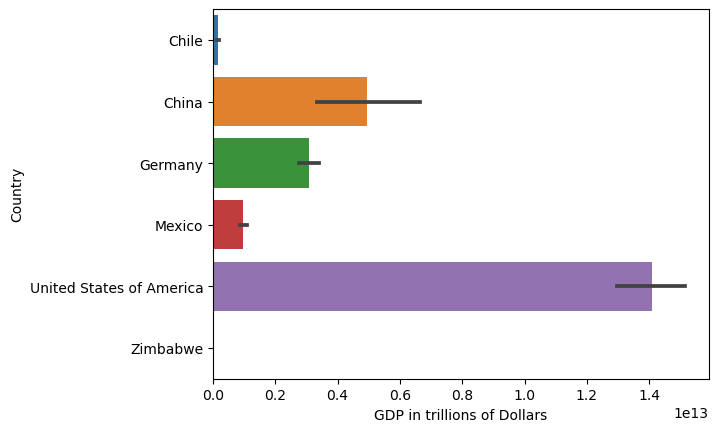

In [66]:
# plot a barplot to compare GDP by country
sns.barplot(x="GDP", y="Country", data=gdp_data)
plt.xlabel('GDP in trillions of Dollars')

[]

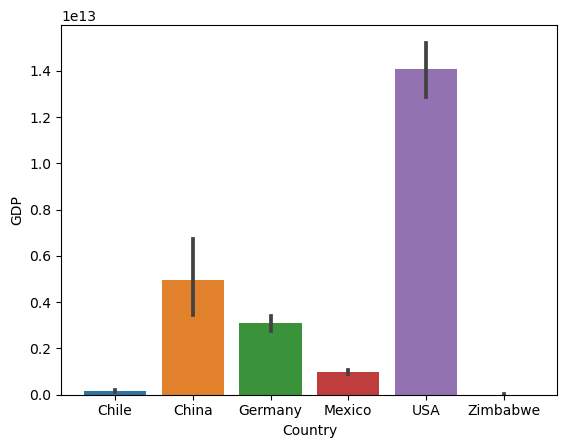

In [14]:
# alternative graph for the avobe barplot
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']


sns.barplot(x='Country', y='GDP', data=gdp_data)
ax=plt.subplot()
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.plot()

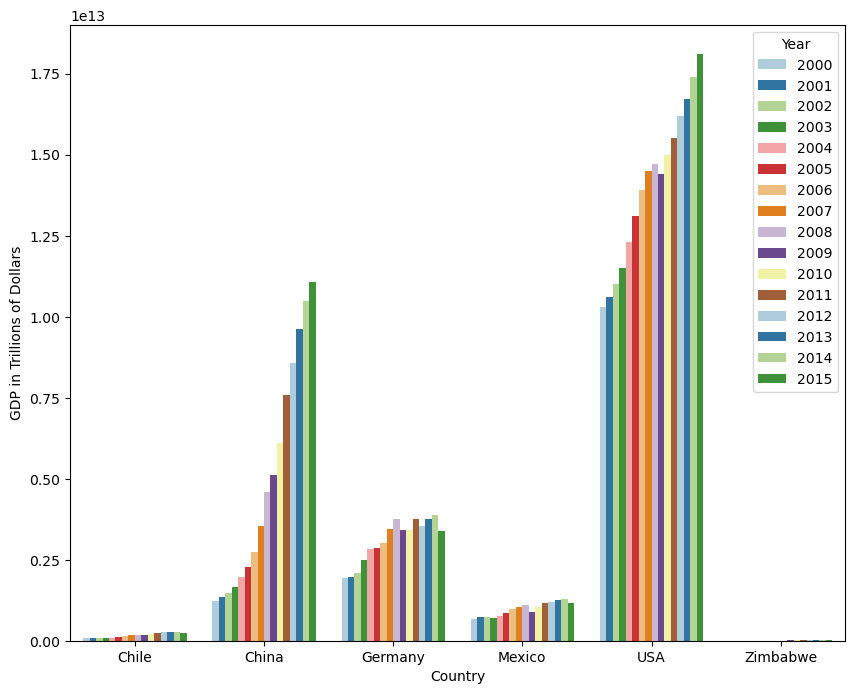

In [97]:
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

ax = plt.subplots(figsize=(10, 8)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=gdp_data, palette=sns.color_palette("Paired"))
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ylabel="GDP in Trillions of Dollars"
plt.ylabel(ylabel)
plt.show()


The United States has a higher GDP in average than any other country, the GDP of Zimbabwe is not even visible which shows their extreamly low GDP, to see the increase of GDP per Year we could explore the GDP in more detail in the following graphics.

c:\Users\oscar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


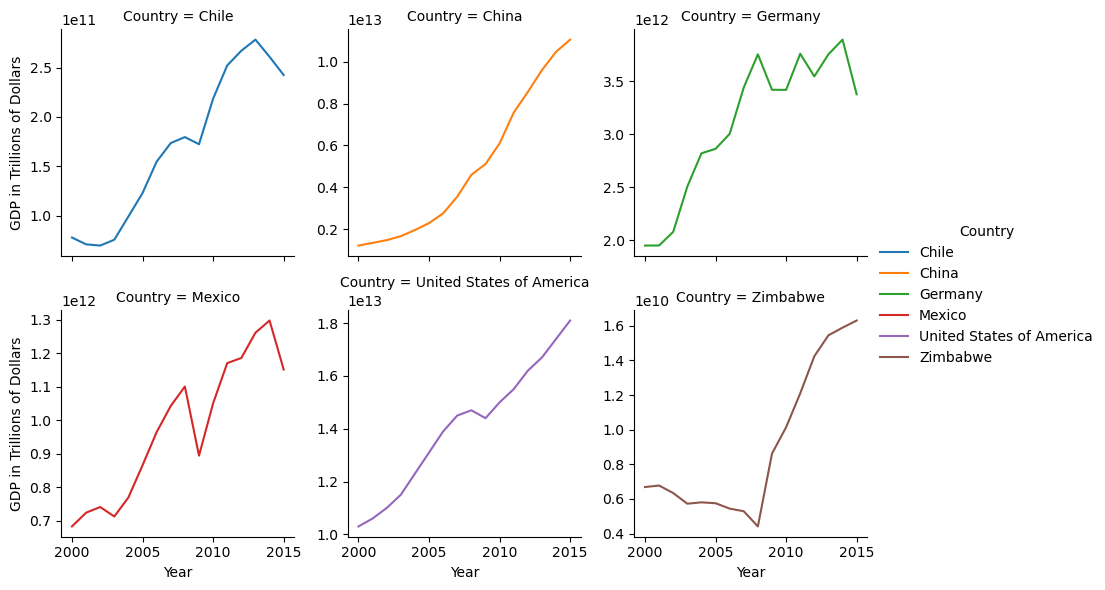

In [64]:
# explore more in detail the change of GDP by country
# we use a Facetgrid from seaborne
graphGDP = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of Dollars"))

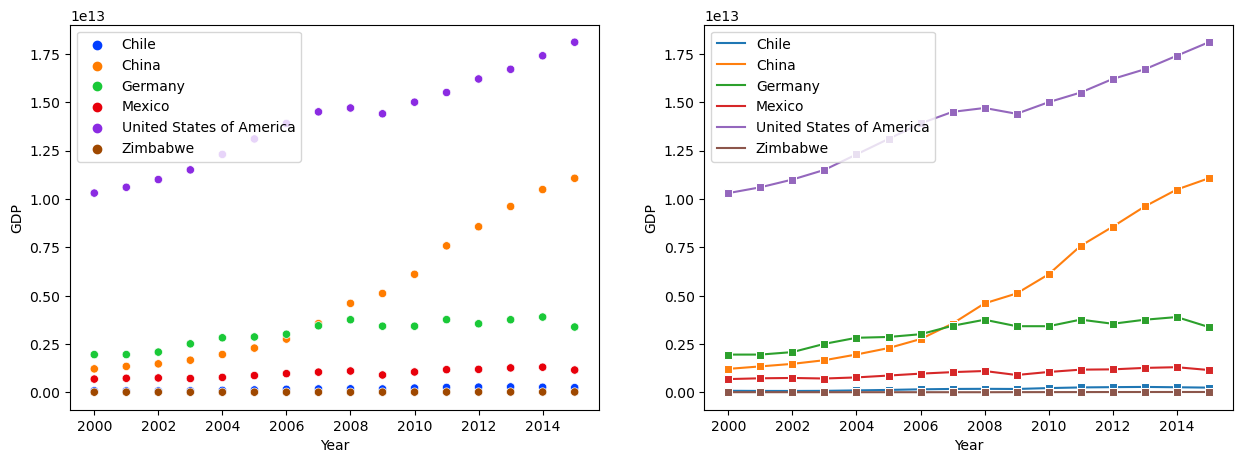

In [88]:
# examine each country individualy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=gdp_data, x='Year', y='GDP', hue='Country', palette='bright')
plt.legend(loc=2)

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=gdp_data, hue='Country', marker='s')
plt.legend(loc=2)
plt.show()

After exploring the GDP in more detail we can see that the GDP has been increasing even in Zimbabwe that wasn't displayed in our initial graph for GDP by country.

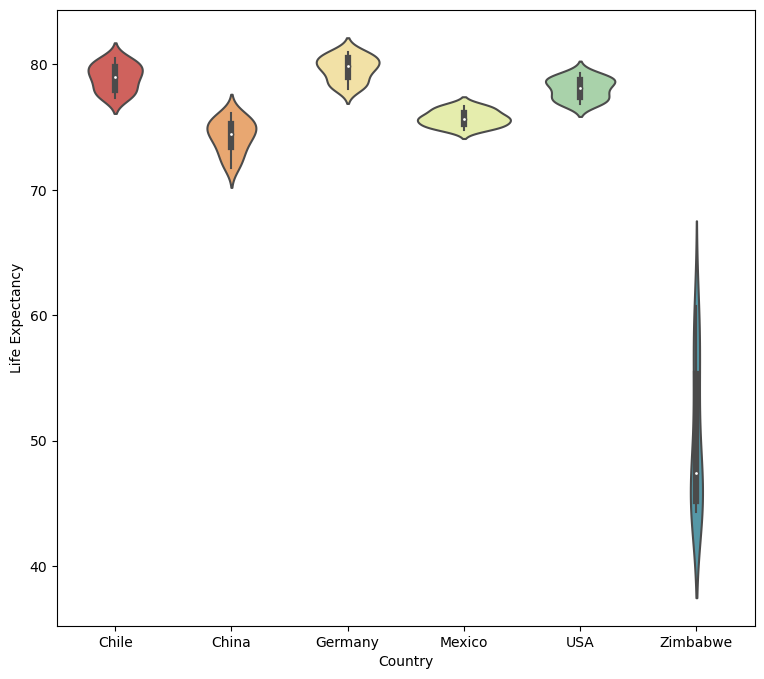

In [15]:
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

plt.figure(figsize=(9, 8))
sns.violinplot(x='Country', y='Life Expectancy', data=gdp_data, palette='Spectral')
ax=plt.subplot()
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.show()

Finally we can take a look to how life expectancy has changed over the years in more detail.

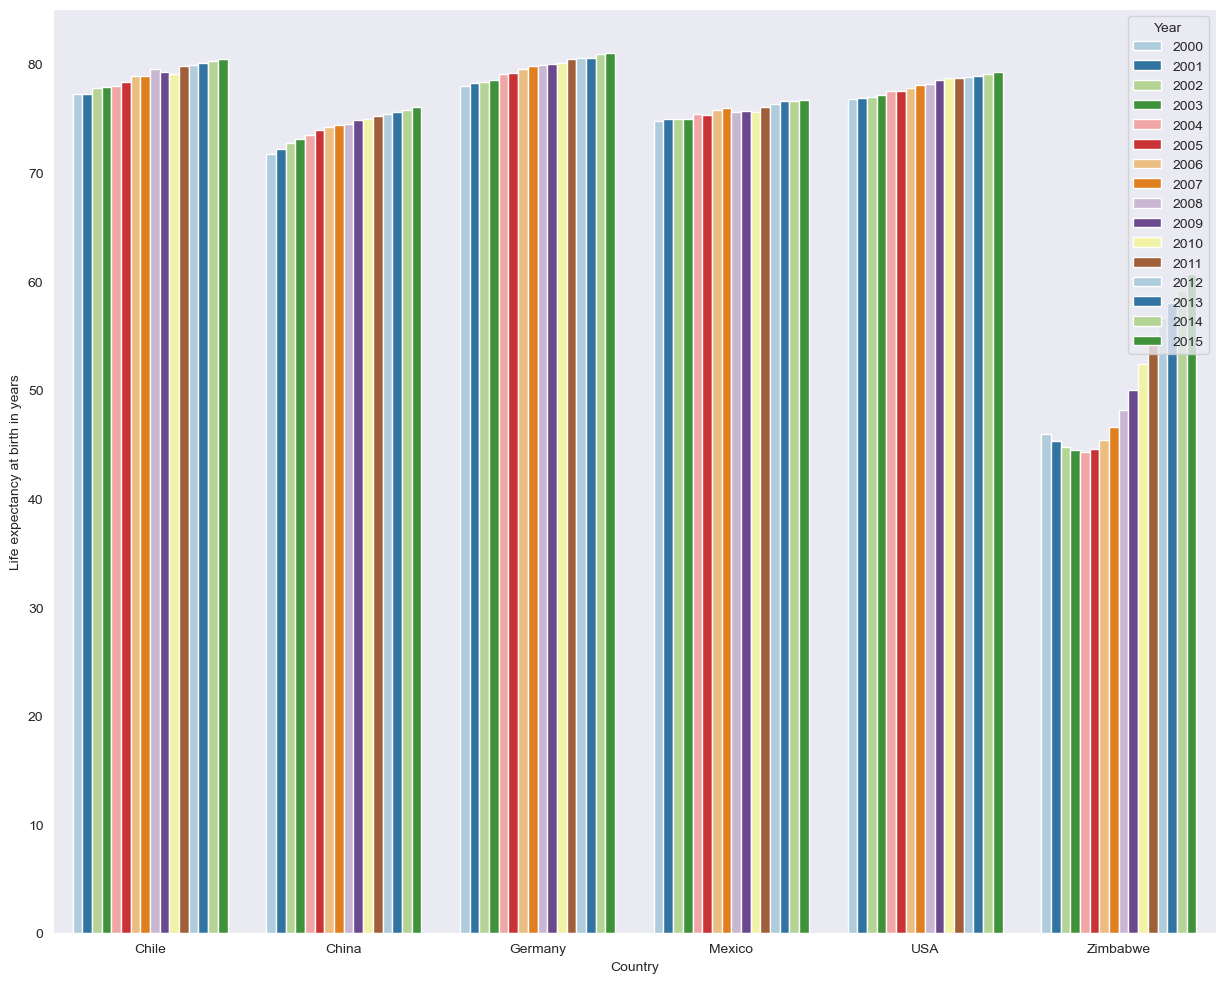

In [116]:
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

ax = plt.subplots(figsize=(15, 12)) 
ax = sns.barplot(x="Country", y="Life Expectancy", hue="Year", data=gdp_data, palette=sns.color_palette("Paired"))
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.ylabel(ylabel)
ax.set(ylabel="Life expectancy at birth in years")
plt.show()

c:\Users\oscar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


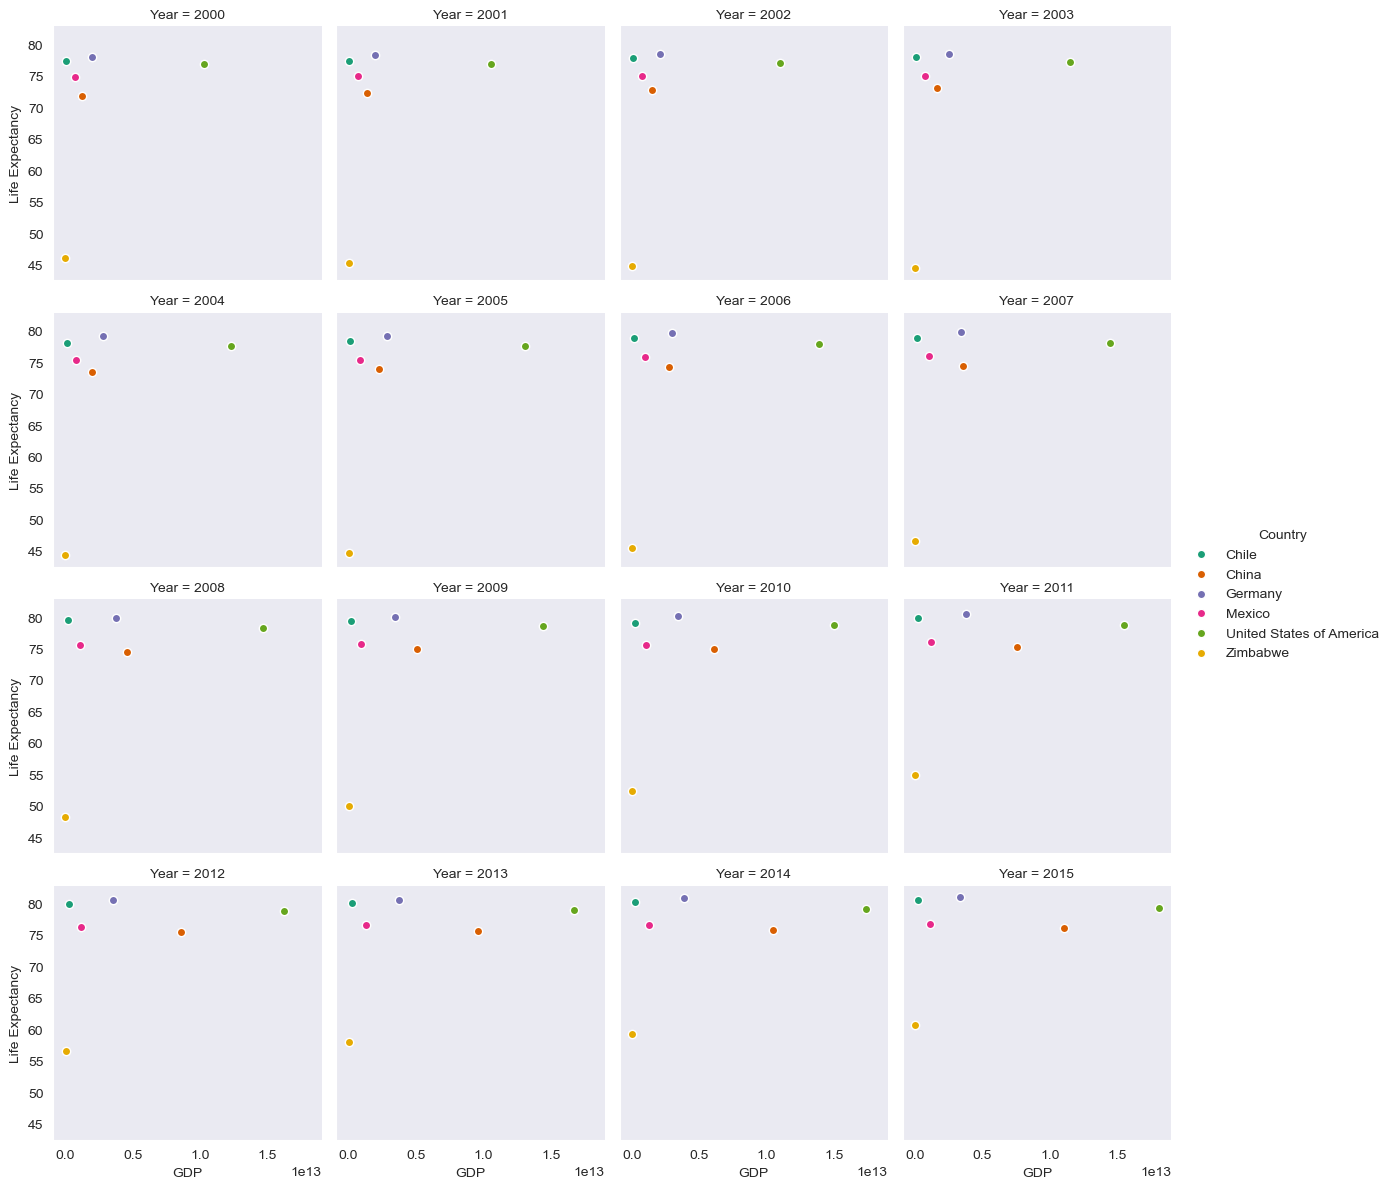

In [119]:
g = sns.FacetGrid(gdp_data, col="Year", hue="Country", col_wrap=4)
g = (g.map(plt.scatter, "GDP", "Life Expectancy", edgecolor="w").add_legend())

c:\Users\oscar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


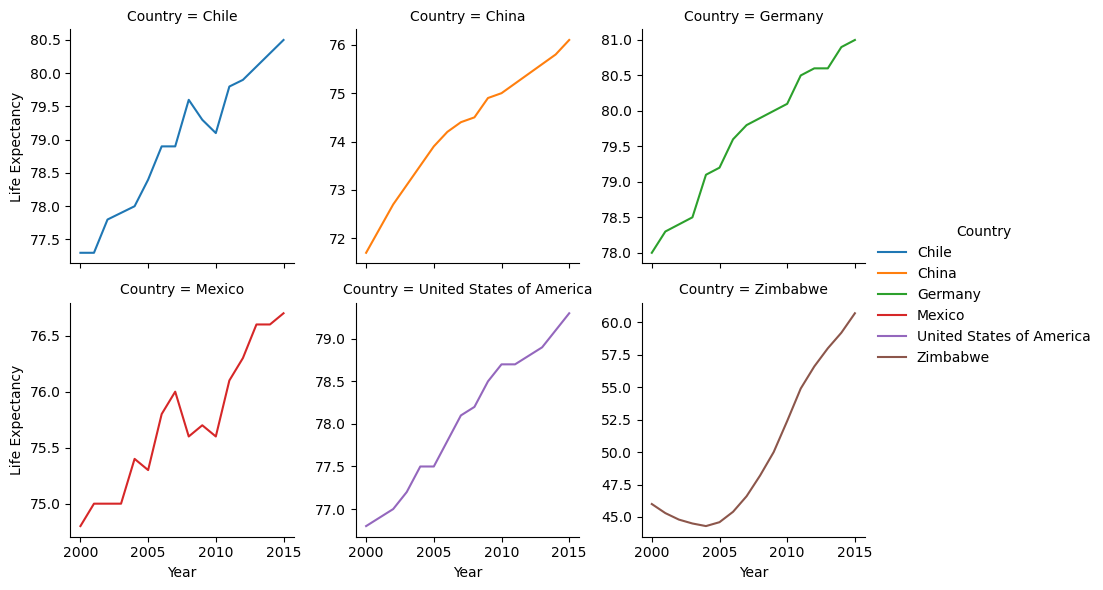

In [11]:
# explore more in detail the change of GDP by country

graphGDP = sns.FacetGrid(gdp_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","Life Expectancy")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy"))